In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


1. Data division

In [18]:
# Load data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
print(f'Train set shape: {X_train.shape}, Train labels shape: {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, Validation labels shape: {y_val.shape}')

Train set shape: (38400, 784), Train labels shape: (38400,)
Validation set shape: (9600, 784), Validation labels shape: (9600,)


2. Initialize and train the model

In [8]:
model = LogisticRegression(max_iter = 1000, solver = 'lbfgs', multi_class = 'multinomial')

model.fit(X_train, y_train)

c:\Users\HP\Documents\GitHub\PRML-Lab01-classification-with-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

3. intialize and train model

In [20]:
# Predict
y_pred = model.predict(X_val)

# Calculate
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       954
           1       0.97      0.96      0.97       930
           2       0.77      0.75      0.76       961
           3       0.85      0.88      0.86       942
           4       0.76      0.78      0.77       960
           5       0.93      0.94      0.94       944
           6       0.63      0.61      0.62       929
           7       0.93      0.92      0.93      1003
           8       0.95      0.95      0.95      1003
           9       0.95      0.94      0.94       974

    accuracy                           0.86      9600
   macro avg       0.86      0.86      0.86      9600
weighted avg       0.86      0.86      0.86      9600



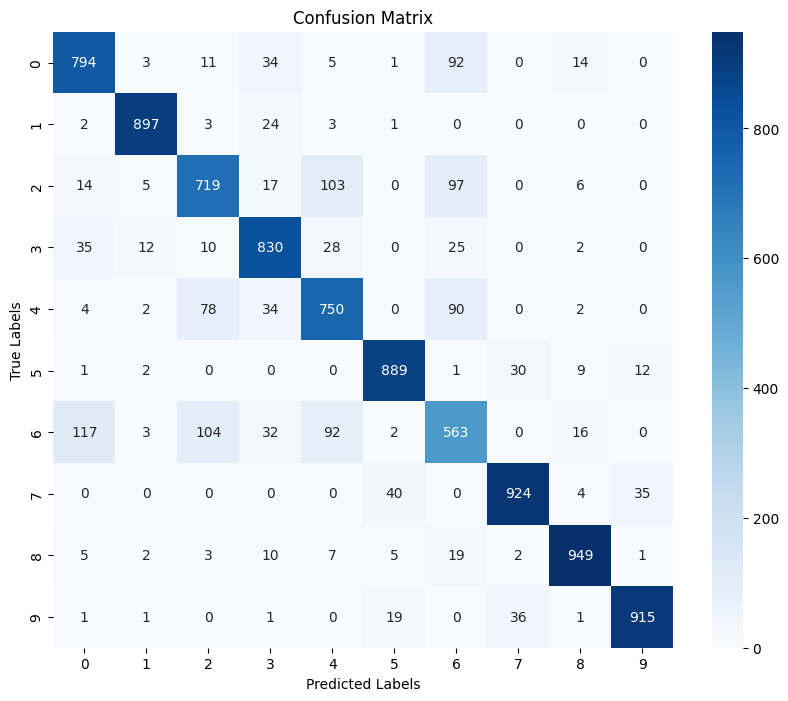

In [17]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
